In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:

batch_size = 32
num_classes = 10
epochs = 10

In [3]:


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print('x_train shape:', x_train.shape)


x_train shape: (50000, 32, 32, 3)


In [5]:
print('x_test shape:', x_test.shape)

x_test shape: (10000, 32, 32, 3)


In [6]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
# Convert class vectors to binary class matrices.

In [9]:
from keras.utils import np_utils

In [10]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


In [11]:
model = Sequential()

In [12]:
### using relu activation 
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [12]:
### using tanh activation ### bad model do not use these 
model.add(Dense(1024, activation='tanh', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 4,206,602
Trainable params: 4,206,602
Non-trainable params: 0
_________________________________________________________________


In [14]:
## using RMSPROP as optimizer
opt = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

In [14]:
## using SGD as optimizer
opt = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 39s - loss: 1.8893 - acc: 0.3211 - val_loss: 1.7107 - val_acc: 0.3975
Epoch 2/10
50000/50000 [==============================] - 39s - loss: 1.7131 - acc: 0.3926 - val_loss: 1.6613 - val_acc: 0.4076
Epoch 3/10
50000/50000 [==============================] - 39s - loss: 1.6399 - acc: 0.4183 - val_loss: 1.6123 - val_acc: 0.4188
Epoch 4/10
50000/50000 [==============================] - 38s - loss: 1.5875 - acc: 0.4385 - val_loss: 1.5455 - val_acc: 0.4488
Epoch 5/10
50000/50000 [==============================] - 32s - loss: 1.5465 - acc: 0.4528 - val_loss: 1.5330 - val_acc: 0.4478
Epoch 6/10
50000/50000 [==============================] - 29s - loss: 1.5092 - acc: 0.4682 - val_loss: 1.5033 - val_acc: 0.4609
Epoch 7/10
50000/50000 [==============================] - 29s - loss: 1.4771 - acc: 0.4762 - val_loss: 1.4530 - val_acc: 0.4797
Epoch 8/10
50000/50000 [==============================

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)

In [18]:
score

[1.4505777521133423, 0.48299999999999998]

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.45057775211
Test accuracy: 0.483


In [38]:
from matplotlib import pyplot

In [43]:
%matplotlib inline

In [40]:
print(history.history['loss'])

[1.8893429062271119, 1.7131253874206542, 1.639910919418335, 1.5874990107345581, 1.546459305343628, 1.5092400466537477, 1.4770949821090698, 1.4507486920166015, 1.4257006283950806, 1.4002597031784059]


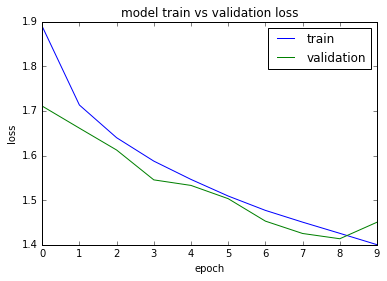

In [45]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()
